# import library

In [1]:
import pandas as pd
import numpy as np

# visioulation
import matplotlib.pyplot as plt
import seaborn as sns

# import information aboyt mysql
import json
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# standard
from sklearn.preprocessing import StandardScaler
# kmeans algorithm
from sklearn.cluster import KMeans


# Set Option

In [2]:
pd.set_option('display.max_columns', None)
plt.style.use("dark_background")

# import Dataset

In [3]:
customer = pd.read_csv("Brazilian E-Commerce/olist_customers_dataset.csv")
location = pd.read_csv("Brazilian E-Commerce/olist_geolocation_dataset.csv")
order_item = pd.read_csv("Brazilian E-Commerce/olist_order_items_dataset.csv")
order = pd.read_csv("Brazilian E-Commerce/olist_orders_dataset.csv")
product = pd.read_csv("Brazilian E-Commerce/olist_products_dataset.csv")

# merge items

In [4]:
print(f"\n customer : {customer.columns}")
print(f"\n location : {location.columns}")
print(f"\n order_item : {order_item.columns}")
print(f"\n order : {order.columns}")
print(f"\n product : {product.columns}")


 customer : Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

 location : Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

 order_item : Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

 order : Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

 product : Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


In [5]:
data = pd.merge(customer,order,on="customer_id",how="left")

data = pd.merge(data,order_item,on="order_id",how="left")

data = pd.merge(data,product , on="product_id",how="left")

location = location.rename(columns={"geolocation_zip_code_prefix": "customer_zip_code_prefix"})
data = pd.merge(data,location,on="customer_zip_code_prefix",how="left")

In [6]:
del customer,order,order_item,product

# check data

In [7]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.515413,-47.398194,franca,SP


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17313741 entries, 0 to 17313740
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   customer_id                    object 
 1   customer_unique_id             object 
 2   customer_zip_code_prefix       int64  
 3   customer_city                  object 
 4   customer_state                 object 
 5   order_id                       object 
 6   order_status                   object 
 7   order_purchase_timestamp       object 
 8   order_approved_at              object 
 9   order_delivered_carrier_date   object 
 10  order_delivered_customer_date  object 
 11  order_estimated_delivery_date  object 
 12  order_item_id                  float64
 13  product_id                     object 
 14  seller_id                      object 
 15  shipping_limit_date            object 
 16  price                          float64
 17  freight_value                  float64
 18  

# rename column

In [9]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state'],
      dtype='object')

In [10]:
data.rename(columns={
    "product_name_lenght": "product_name_length",
    "product_description_lenght": "product_desc_length",
    "order_purchase_timestamp": "purchase_time",
    "geolocation_lat": "latitude",
    "geolocation_lng": "longitude",
    "product_weight_g": "weight_g",
    "product_length_cm": "length_cm"
},inplace=True)

In [11]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'purchase_time', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_length', 'product_desc_length', 'product_photos_qty',
       'weight_g', 'length_cm', 'product_height_cm', 'product_width_cm',
       'latitude', 'longitude', 'geolocation_city', 'geolocation_state'],
      dtype='object')

# non value

In [12]:
data.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
purchase_time                         0
order_approved_at                 25515
order_delivered_carrier_date     301998
order_delivered_customer_date    471013
order_estimated_delivery_date         0
order_item_id                    117558
product_id                       117558
seller_id                        117558
shipping_limit_date              117558
price                            117558
freight_value                    117558
product_category_name            358118
product_name_length              358118
product_desc_length              358118
product_photos_qty               358118
weight_g                         121060
length_cm                        121060
product_height_cm                121060


In [13]:
data.isnull().mean()*100

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
purchase_time                    0.000000
order_approved_at                0.147368
order_delivered_carrier_date     1.744268
order_delivered_customer_date    2.720458
order_estimated_delivery_date    0.000000
order_item_id                    0.678987
product_id                       0.678987
seller_id                        0.678987
shipping_limit_date              0.678987
price                            0.678987
freight_value                    0.678987
product_category_name            2.068403
product_name_length              2.068403
product_desc_length              2.068403
product_photos_qty               2.068403
weight_g                         0.699213
length_cm                        0

In [14]:
# product_category_name
data["product_category_name"].fillna("Unknown",inplace=True)

C:\Users\aliaj\AppData\Local\Temp\ipykernel_16084\950076858.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["product_category_name"].fillna("Unknown",inplace=True)


In [15]:
data['latitude'].fillna(data.groupby('geolocation_city')['latitude'].transform('median'), inplace=True)

C:\Users\aliaj\AppData\Local\Temp\ipykernel_16084\3383998918.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['latitude'].fillna(data.groupby('geolocation_city')['latitude'].transform('median'), inplace=True)


In [16]:
data['purchase_time'] = pd.to_datetime(data['purchase_time'])
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])

avg_carrier_delay = (data['order_delivered_carrier_date'] - data['purchase_time']).median()

data['order_delivered_carrier_date'] = data['order_delivered_carrier_date'].fillna(
    data['purchase_time'] + avg_carrier_delay
)
del avg_carrier_delay

In [17]:
data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date'])
data['shipping_limit_date'] = data['shipping_limit_date'].fillna(
    data['purchase_time'] + pd.Timedelta(days=3)
)

In [18]:
data['freight_value'] = np.where(
    data['freight_value'].isna(),
    data['price'] * 0.05,
    data['freight_value']
)

In [19]:
data['price'] = data['price'].fillna(data['price'].median())
data['order_item_id'] = data.groupby('order_id').cumcount() + 1

In [20]:
data["weight_g"] = data.groupby('product_category_name')["weight_g"].transform(lambda x: x.fillna(x.median()))
data["length_cm"] = data.groupby('product_category_name')["length_cm"].transform(lambda x: x.fillna(x.median()))
data["product_height_cm"] = data.groupby('product_category_name')["product_height_cm"].transform(lambda x: x.fillna(x.median()))
data["product_width_cm"] = data.groupby('product_category_name')["product_width_cm"].transform(lambda x: x.fillna(x.median()))

In [21]:
data['product_name_length'] = data.groupby('product_category_name')['product_name_length'].transform(lambda x: x.fillna(x.median()))
data['product_desc_length'] = data['product_desc_length'].fillna(0)
data['product_photos_qty'] = data['product_photos_qty'].fillna(1)
data['seller_id'] = data['seller_id'].fillna('unknown_seller')
data["product_id"] = data["product_id"].fillna("0")

In [22]:
data['product_name_length'] = data.groupby('product_category_name')['product_name_length'].transform(
    lambda x: x.fillna(x.median()))

if data['product_name_length'].notna().any():
    data['product_name_length'] = data.groupby('product_category_name')['product_name_length'].transform(
        lambda x: x.fillna(round(x.mean())) if x.notna().any() else x
    )
    
    data['product_name_length'] = data['product_name_length'].fillna(
        round(data['product_name_length'].mean())
    )
else:
    data['product_name_length'] = 0  

data['product_name_length'] = data['product_name_length'].astype(int)

In [23]:
data["latitude"] = data.groupby('geolocation_city')["latitude"].transform(lambda x: x.fillna(x.median()))
data["longitude"] = data.groupby('geolocation_city')["longitude"].transform(lambda x: x.fillna(x.median()))
data["latitude"] = data["latitude"].fillna(data["latitude"].mode()[0])
data["longitude"] = data["longitude"].fillna(data["longitude"].mode()[0])

In [24]:
data['geolocation_city'] = data['geolocation_city'].fillna(
    data['geolocation_city'].mode()[0]
)

data['geolocation_state'] = data['geolocation_state'].fillna(
    data['geolocation_state'].mode()[0]
)

In [25]:
data.isnull().mean()*100

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
purchase_time                    0.000000
order_approved_at                0.147368
order_delivered_carrier_date     0.000000
order_delivered_customer_date    2.720458
order_estimated_delivery_date    0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.678987
product_category_name            0.000000
product_name_length              0.000000
product_desc_length              0.000000
product_photos_qty               0.000000
weight_g                         0.000000
length_cm                        0

# remove additional column

In [26]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,purchase_time,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_desc_length,product_photos_qty,weight_g,length_cm,product_height_cm,product_width_cm,latitude,longitude,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,3,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,4,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,5,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.515413,-47.398194,franca,SP


In [27]:
data.drop(columns=["order_delivered_customer_date","order_approved_at","customer_city"],inplace=True)

# data type

In [28]:
data.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_state                           object
order_id                                 object
order_status                             object
purchase_time                    datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_estimated_delivery_date            object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_length                       int32
product_desc_length                     float64
product_photos_qty                      float64
weight_g                                float64
length_cm                               

In [29]:
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state,order_id,order_status,purchase_time,order_delivered_carrier_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_desc_length,product_photos_qty,weight_g,length_cm,product_height_cm,product_width_cm,latitude,longitude,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-06-05 00:00:00,2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-06-05 00:00:00,3,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-06-05 00:00:00,4,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-06-05 00:00:00,5,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17313736,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-21 19:17:21,2018-01-08 00:00:00,130,017692475c1c954ff597feda05131d73,3c7c4a49ec3c6550809089c6a2ca9370,2017-12-26 18:50:39,13.99,7.78,perfumaria,54,933.0,1.0,50.0,16.0,5.0,11.0,-23.599369,-46.905603,cotia,SP
17313737,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-21 19:17:21,2018-01-08 00:00:00,131,017692475c1c954ff597feda05131d73,3c7c4a49ec3c6550809089c6a2ca9370,2017-12-26 18:50:39,13.99,7.78,perfumaria,54,933.0,1.0,50.0,16.0,5.0,11.0,-23.593577,-46.910112,cotia,SP
17313738,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-21 19:17:21,2018-01-08 00:00:00,132,017692475c1c954ff597feda05131d73,3c7c4a49ec3c6550809089c6a2ca9370,2017-12-26 18:50:39,13.99,7.78,perfumaria,54,933.0,1.0,50.0,16.0,5.0,11.0,-23.584425,-46.892014,cotia,SP
17313739,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,SP,28db69209a75e59f20ccbb5c36a20b90,delivered,2017-12-19 14:27:23,2017-12-21 19:17:21,2018-01-08 00:00:00,133,017692475c1c954ff597feda05131d73,3c7c4a49ec3c6550809089c6a2ca9370,2017-12-26 18:50:39,13.99,7.78,perfumaria,54,933.0,1.0,50.0,16.0,5.0,11.0,-23.595022,-46.918546,cotia,SP


In [30]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_state', 'order_id', 'order_status', 'purchase_time',
       'order_delivered_carrier_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_length', 'product_desc_length', 'product_photos_qty',
       'weight_g', 'length_cm', 'product_height_cm', 'product_width_cm',
       'latitude', 'longitude', 'geolocation_city', 'geolocation_state'],
      dtype='object')

- factorize() converts categorical values into numerical codes.
- codes contains the numeric representation of each category.

In [31]:
data['customer_id'] = pd.factorize(data['customer_id'])[0] + 1
data["customer_id"] = data["customer_id"].astype("int")

data['customer_unique_id'] = pd.factorize(data['customer_unique_id'])[0] + 1
data["customer_unique_id"] = data["customer_unique_id"].astype("int")

data['order_id'] = pd.factorize(data['order_id'])[0] + 1
data["order_id"] = data["order_id"].astype("int")

data['product_id'] = pd.factorize(data['product_id'])[0] + 1
data["product_id"] = data["product_id"].astype("int")

data['seller_id'] = pd.factorize(data['seller_id'])[0] + 1
data["seller_id"] = data["seller_id"].astype("int")

In [32]:
data["order_delivered_carrier_date"] = pd.to_datetime(data["order_delivered_carrier_date"])
data["shipping_limit_date"] = pd.to_datetime(data["shipping_limit_date"])
data["order_estimated_delivery_date"] = pd.to_datetime(data["order_estimated_delivery_date"])

In [33]:
data["order_item_id"]= data["order_item_id"].astype("int")

In [34]:
data.dtypes

customer_id                               int32
customer_unique_id                        int32
customer_zip_code_prefix                  int64
customer_state                           object
order_id                                  int32
order_status                             object
purchase_time                    datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int32
product_id                                int32
seller_id                                 int32
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_length                       int32
product_desc_length                     float64
product_photos_qty                      float64
weight_g                                float64
length_cm                               

# drop duplicate

In [35]:
data.drop_duplicates(inplace=True)

In [36]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state,order_id,order_status,purchase_time,order_delivered_carrier_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_desc_length,product_photos_qty,weight_g,length_cm,product_height_cm,product_width_cm,latitude,longitude,geolocation_city,geolocation_state
0,1,1,14409,SP,1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-06-05,1,1,1,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.509897,-47.397866,franca,SP
1,1,1,14409,SP,1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-06-05,2,1,1,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.497396,-47.399241,franca,SP
2,1,1,14409,SP,1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-06-05,3,1,1,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.510459,-47.399553,franca,SP
3,1,1,14409,SP,1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-06-05,4,1,1,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.480940,-47.394161,franca,SP
4,1,1,14409,SP,1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-06-05,5,1,1,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41,1141.0,1.0,8683.0,54.0,64.0,31.0,-20.515413,-47.398194,franca,SP


# Feature Engineering

In [37]:
data["delivery_time"] = (data["order_delivered_carrier_date"] - data["purchase_time"]).dt.days

In [38]:
customer_features = data.groupby("customer_unique_id").agg(
    total_purchases=("order_id", "count"),
    avg_order_value=("price", "mean"),
    total_spent=("price", "sum"),
    last_purchase_date=("purchase_time", "max"),
    purchase_frequency=("purchase_time", lambda x: x.sort_values().diff().mean())
).reset_index()

data = data.merge(customer_features, on="customer_unique_id", how="left")

In [39]:
data["purchase_frequency"] = data["purchase_frequency"].dt.days

In [40]:
data_clean = data.dropna()

# K-Means

In [41]:
features = data_clean[['total_spent', 'purchase_frequency', 'avg_order_value']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [42]:
# تعیین تعداد خوشهها با Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

c:\Users\aliaj\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\aliaj\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\aliaj\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\aliaj\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\aliaj\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

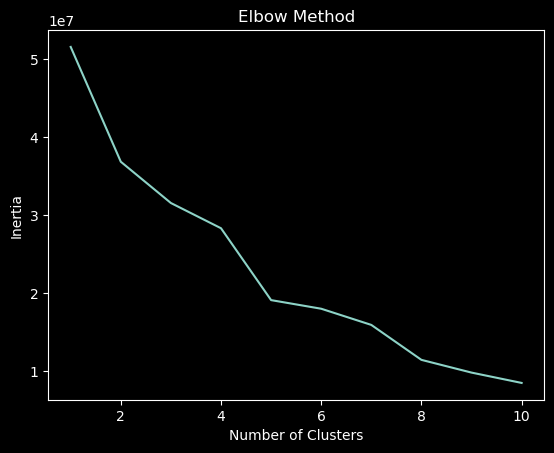

In [43]:
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [44]:
# اجرای K-Means با k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data_clean['cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\aliaj\AppData\Local\Temp\ipykernel_16084\708114221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['cluster'] = kmeans.fit_predict(scaled_features)


In [45]:
# visioulation

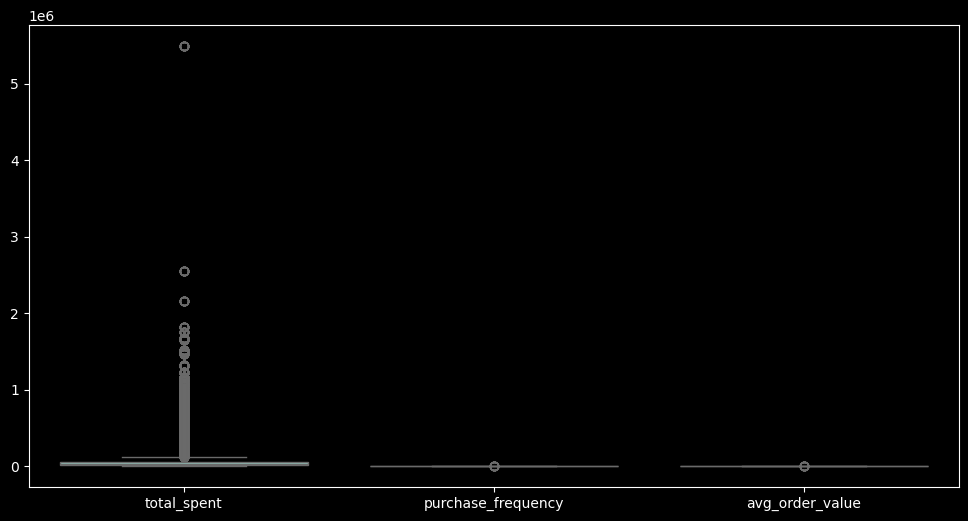

In [46]:
features = ["total_spent", "purchase_frequency", "avg_order_value"]
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_clean[features])
plt.show()

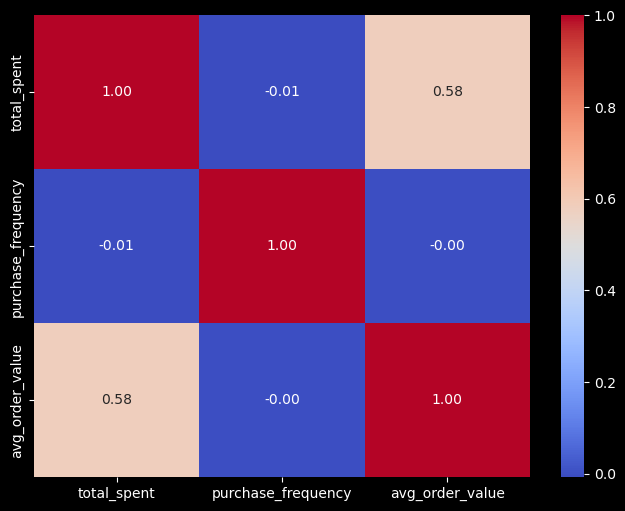

In [47]:
correlation_matrix = data_clean[features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [48]:
data_clean.to_csv("database_export\data clean.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aliaj\AppData\Local\Temp\ipykernel_16084\1617878716.py:1: SyntaxWarning: invalid escape sequence '\d'
  data_clean.to_csv("database_export\data clean.csv")
